In [373]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Student

In [374]:
# Read student dataset
student_df = pd.read_csv('data.csv', sep=";")
student_df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [375]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Preprocessing

In [376]:
# Check if any value is missing
student_df.isnull().values.any()

False

In [377]:
# Inspect the structure
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [378]:
# Check columns unique value
student_df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [379]:
# Drop unused columns
unused_col = ['Previous qualification (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
              'Previous qualification (grade)', 'Age at enrollment', 'Admission grade', "Father's occupation",
              "Mother's qualification", "Father's qualification", "Mother's occupation"]
student_df = student_df.drop(columns=unused_col)

In [380]:
# Remove more columns
student_df = student_df[['International', 'Gender', 'Target']]

In [381]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   International  4424 non-null   int64 
 1   Gender         4424 non-null   int64 
 2   Target         4424 non-null   object
dtypes: int64(2), object(1)
memory usage: 103.8+ KB


In [382]:
# Target unique number
student_df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [383]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   International  4424 non-null   int64 
 1   Gender         4424 non-null   int64 
 2   Target         4424 non-null   object
dtypes: int64(2), object(1)
memory usage: 103.8+ KB


## Classification

In [384]:
# Get the data and labels 
data = student_df.drop(columns='Target')
labels = student_df['Target']

In [385]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [386]:
print(labels.shape, data.shape)

(4424,) (4424, 2)


In [387]:
y_train

3383     Dropout
2840    Enrolled
564     Graduate
1786     Dropout
3900    Graduate
          ...   
3444     Dropout
466     Enrolled
3092    Graduate
3772    Graduate
860      Dropout
Name: Target, Length: 3539, dtype: object

### Classification with KNN

In [388]:
# Model
model_knn = KNeighborsClassifier(n_neighbors=3)

In [389]:
# Fit
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [390]:
knn_predict = model_knn.predict(x_test)

In [391]:
labels.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [392]:
acc = round(accuracy_score(y_test, knn_predict), 2)
prs = round(precision_score(y_test, knn_predict, average='macro'), 2)
rll = round(recall_score(y_test, knn_predict, average='macro'), 2)
f1 = round(f1_score(y_test, knn_predict, average='macro'), 2)

c:\Users\Jeffr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [393]:
print(f'Accuracy Score: {acc}\nPrecision Score: {prs} \nRecall Score: {rll} \nF1 Score: {f1}')

Accuracy Score: 0.36
Precision Score: 0.3 
Recall Score: 0.34 
F1 Score: 0.19


### DecisionTree Classfication

In [394]:
# Model
model_dt = DecisionTreeClassifier(random_state=0)

In [395]:
# Fit
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [396]:
# Predict
dt_predict = model_dt.predict(x_test)

In [397]:
acc = round(accuracy_score(y_test, dt_predict), 2)
prs = round(precision_score(y_test, dt_predict, average='macro'), 2)
rll = round(recall_score(y_test, dt_predict, average='macro'), 2)
f1 = round(f1_score(y_test, dt_predict, average='macro'), 2)

c:\Users\Jeffr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [398]:
print(f'Accuracy Score: {acc}\nPrecision Score: {prs} \nRecall Score: {rll} \nF1 Score: {round(f1, 2)}')

Accuracy Score: 0.56
Precision Score: 0.37 
Recall Score: 0.44 
F1 Score: 0.4


### LinearSVC

In [399]:
model_svc = LinearSVC(random_state=1)

In [400]:
# fit
model_svc.fit(x_train, y_train)

c:\Users\Jeffr\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=1)

In [401]:
# Predict
svc_predict = model_svc.predict(x_test)

In [402]:
acc = round(accuracy_score(y_test, svc_predict), 2)
prs = round(precision_score(y_test, svc_predict, average='macro'), 2)
rll = round(recall_score(y_test, svc_predict, average='macro'), 2)
f1 = round(f1_score(y_test, svc_predict, average='macro'), 2)

c:\Users\Jeffr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [403]:
print(f'Accuracy Score: {acc}\nPrecision Score: {prs} \nRecall Score: {rll} \nF1 Score: {round(f1, 2)}')

Accuracy Score: 0.56
Precision Score: 0.37 
Recall Score: 0.44 
F1 Score: 0.4


## Confusion Matrix

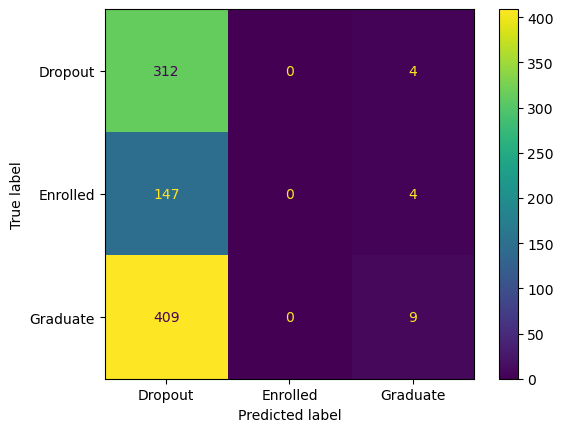

In [404]:
# KNN Confusion Matrix
cm = confusion_matrix(y_test, knn_predict, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.show()

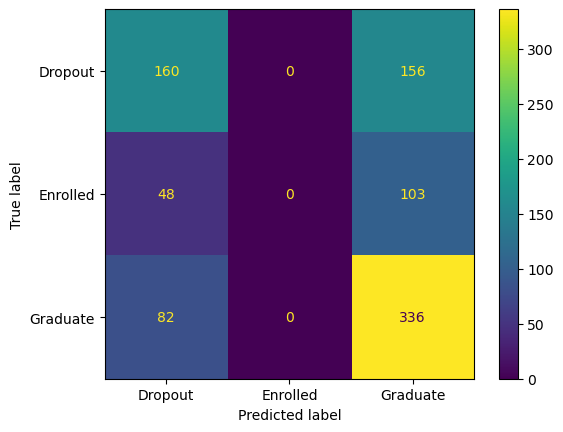

In [405]:
# DecisionTree Confusion Matrix
cm = confusion_matrix(y_test, dt_predict, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot()
plt.show()

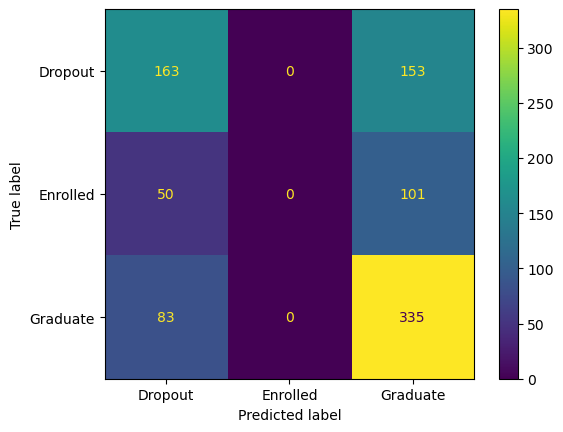

In [406]:
# SVC Confusion Matrix
cm = confusion_matrix(y_test, svc_predict, labels=model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svc.classes_)
disp.plot()
plt.show()